In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv("./airline_reviews_sen.csv")
df= reviews.copy()

In [ ]:
df.shape

(10400, 2)

The next thing to do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
df

,reviews,Airlines
0,✅ Trip Verified | Check in in Riga was fast f...,finnair
1,"✅ Trip Verified | Unhelpful, untrained check-...",finnair
2,Not Verified | Very disappointing customer ex...,finnair
3,Not Verified | Was very disappointed with my r...,finnair
4,✅ Trip Verified | No champagne when boarding....,finnair
...,...,...
10395,✅ Trip Verified | I am disgusted at the amoun...,Ryanair
10396,✅ Trip Verified | I have over 20 flights with ...,Ryanair
10397,✅ Trip Verified | Malaga to Newcastle. We had ...,Ryanair
10398,✅ Trip Verified | I went on a short city break...,Ryanair


Removing the parts before | in the reviews column

In [ ]:
df.reviews= df.reviews.apply(lambda x: x.split('|')[1] if '|' in x else x)
#df.reviews= df.reviews.str.split('|',expand=True)[1]

In [ ]:
df

,reviews,Airlines
0,Check in in Riga was fast friendly. Although...,finnair
1,"Unhelpful, untrained check-in staff that doe...",finnair
2,Very disappointing customer experience with ...,finnair
3,Was very disappointed with my recent experien...,finnair
4,No champagne when boarding. Apparently some ...,finnair
...,...,...
10395,I am disgusted at the amount I had to pay be...,Ryanair
10396,I have over 20 flights with this company and ...,Ryanair
10397,Malaga to Newcastle. We had a few issues at t...,Ryanair
10398,I went on a short city break with my boyfrien...,Ryanair


**Rule-based approach**

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.



# Step 1: Cleaning the text

In [ ]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Airlines,Cleaned Reviews
0,Check in in Riga was fast friendly. Although...,finnair,Check in in Riga was fast friendly Although n...
1,"Unhelpful, untrained check-in staff that doe...",finnair,Unhelpful untrained check in staff that does ...
2,Very disappointing customer experience with ...,finnair,Very disappointing customer experience with F...
3,Was very disappointed with my recent experien...,finnair,Was very disappointed with my recent experien...
4,No champagne when boarding. Apparently some ...,finnair,No champagne when boarding Apparently some ru...


# Step 2: Tokenization

Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

# Step 3: Enrichment – POS tagging

Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

# Step 4: Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

# Step 5: Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.


In [ ]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words,
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Airlines,Cleaned Reviews,POS tagged
0,Check in in Riga was fast friendly. Although...,finnair,Check in in Riga was fast friendly Although n...,"[(Check, n), (Riga, n), (fast, r), (friendly, ..."
1,"Unhelpful, untrained check-in staff that doe...",finnair,Unhelpful untrained check in staff that does ...,"[(Unhelpful, a), (untrained, a), (check, n), (..."
2,Very disappointing customer experience with ...,finnair,Very disappointing customer experience with F...,"[(disappointing, a), (customer, n), (experienc..."
3,Was very disappointed with my recent experien...,finnair,Was very disappointed with my recent experien...,"[(disappointed, a), (recent, a), (experience, ..."
4,No champagne when boarding. Apparently some ...,finnair,No champagne when boarding Apparently some ru...,"[(champagne, n), (boarding, v), (Apparently, r..."


In [ ]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Airlines,Cleaned Reviews,POS tagged,Lemma
0,Check in in Riga was fast friendly. Although...,finnair,Check in in Riga was fast friendly Although n...,"[(Check, n), (Riga, n), (fast, r), (friendly, ...",Check Riga fast friendly Although noisy ATR ...
1,"Unhelpful, untrained check-in staff that doe...",finnair,Unhelpful untrained check in staff that does ...,"[(Unhelpful, a), (untrained, a), (check, n), (...",Unhelpful untrained check staff know anythin...
2,Very disappointing customer experience with ...,finnair,Very disappointing customer experience with F...,"[(disappointing, a), (customer, n), (experienc...",disappointing customer experience Finnair Fl...
3,Was very disappointed with my recent experien...,finnair,Was very disappointed with my recent experien...,"[(disappointed, a), (recent, a), (experience, ...",disappointed recent experience customer serv...
4,No champagne when boarding. Apparently some ...,finnair,No champagne when boarding Apparently some ru...,"[(champagne, n), (boarding, v), (Apparently, r...",champagne board Apparently rule Finnair serv...


In [ ]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Check in in Riga was fast friendly. Although...,Check Riga fast friendly Although noisy ATR ...
1,"Unhelpful, untrained check-in staff that doe...",Unhelpful untrained check staff know anythin...
2,Very disappointing customer experience with ...,disappointing customer experience Finnair Fl...
3,Was very disappointed with my recent experien...,disappointed recent experience customer serv...
4,No champagne when boarding. Apparently some ...,champagne board Apparently rule Finnair serv...
...,...,...
10395,I am disgusted at the amount I had to pay be...,disgust amount pay forget check online round...
10396,I have over 20 flights with this company and ...,flight company still current booking mean qu...
10397,Malaga to Newcastle. We had a few issues at t...,Malaga Newcastle issue check family travel r...
10398,I went on a short city break with my boyfrien...,go short city break boyfriend New Year fly E...


# Sentiment Analysis using VADER

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.



In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Airlines,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Check in in Riga was fast friendly. Although...,finnair,Check in in Riga was fast friendly Although n...,"[(Check, n), (Riga, n), (fast, r), (friendly, ...",Check Riga fast friendly Although noisy ATR ...,0.9442,Positive
1,"Unhelpful, untrained check-in staff that doe...",finnair,Unhelpful untrained check in staff that does ...,"[(Unhelpful, a), (untrained, a), (check, n), (...",Unhelpful untrained check staff know anythin...,0.5994,Positive
2,Very disappointing customer experience with ...,finnair,Very disappointing customer experience with F...,"[(disappointing, a), (customer, n), (experienc...",disappointing customer experience Finnair Fl...,-0.4215,Negative
3,Was very disappointed with my recent experien...,finnair,Was very disappointed with my recent experien...,"[(disappointed, a), (recent, a), (experience, ...",disappointed recent experience customer serv...,-0.8689,Negative
4,No champagne when boarding. Apparently some ...,finnair,No champagne when boarding Apparently some ru...,"[(champagne, n), (boarding, v), (Apparently, r...",champagne board Apparently rule Finnair serv...,0.6808,Positive


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    4842
Negative    4386
Neutral     1172
Name: Analysis, dtype: int64

# Visual Representation

([<matplotlib.patches.Wedge at 0x7f609f12a9b0>,
 [Text(0.11839549234899106, 1.0936098515427886, 'Positive'),
  Text(-0.4898921834595399, -0.984888647810119, 'Negative'),
  Text(1.2664170976348452, -0.46764060433000837, 'Neutral')],
 [Text(0.06457935946308603, 0.5965144644778846, '46.6%'),
  Text(-0.2672139182506581, -0.5372119897146103, '42.2%'),
  Text(0.797373728140458, -0.2944403805040793, '11.3%')])

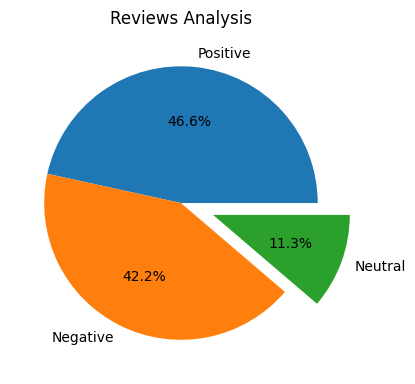

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [ ]:
df.head()

,reviews,Airlines,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Check in in Riga was fast friendly. Although...,Finnair,Check in in Riga was fast friendly Although n...,"[(Check, n), (Riga, n), (fast, r), (friendly, ...",Check Riga fast friendly Although noisy ATR ...,0.9442,Positive
1,"Unhelpful, untrained check-in staff that doe...",Finnair,Unhelpful untrained check in staff that does ...,"[(Unhelpful, a), (untrained, a), (check, n), (...",Unhelpful untrained check staff know anythin...,0.5994,Positive
2,Very disappointing customer experience with ...,Finnair,Very disappointing customer experience with F...,"[(disappointing, a), (customer, n), (experienc...",disappointing customer experience Finnair Fl...,-0.4215,Negative
3,Was very disappointed with my recent experien...,Finnair,Was very disappointed with my recent experien...,"[(disappointed, a), (recent, a), (experience, ...",disappointed recent experience customer serv...,-0.8689,Negative
4,No champagne when boarding. Apparently some ...,Finnair,No champagne when boarding Apparently some ru...,"[(champagne, n), (boarding, v), (Apparently, r...",champagne board Apparently rule Finnair serv...,0.6808,Positive


In [ ]:
df.to_csv("./sentiment_reviews.csv", index=False)

# Wordcloud

Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

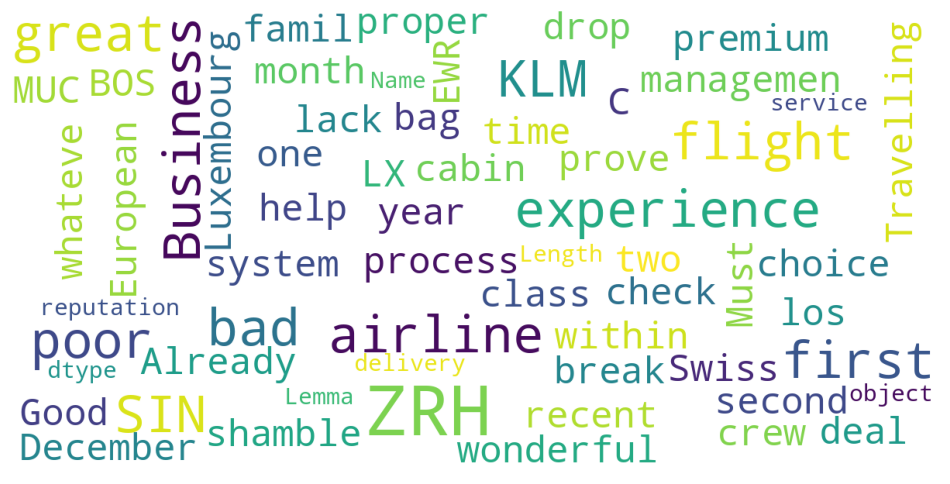

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)